In [85]:
### Module imports ###
import torch
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

from embedding import embedding, read_audio
from test import load_model
import config as cf

np.random.seed()
torch.manual_seed(0)
torch.cuda.manual_seed(0)

In [86]:
### Function declarations ###
def euclide_distance(arr1, arr2):
    '''
    Input: 2 vector(numpy array)
    Output: euclide distance of 2 vector(array)
    '''
    return np.sqrt(np.sum(np.power((arr1 -arr2), 2)))

def cosine_similarity(arr1, arr2):
    '''
    Input: 2 vector(numpy array)
    Output: cosine similarity of 2 vector(array)
    ''' 
    dot = np.dot(arr1, arr2)
    norma = np.linalg.norm(arr1)
    normb = np.linalg.norm(arr2)
    cos = dot / (norma * normb)
    return cos

model = load_model('models/best_model.pkl', mode='embedding')
sample = torch.rand(1, 1, 128, 128).cuda()
model(sample)

tensor([[    0.0000,  3507.9092,    35.5346,   965.0853,     0.0000,  2302.3926,
          7300.9229,  6139.8208,     0.0000,  1435.1692,  3559.1587,  7895.1924,
            86.5122,     0.0000,   272.1429,  4312.5762,     0.0000,  4228.6738,
          5137.4155,  1516.6392,  4133.6948,     0.0000,     0.0000,  3883.2427,
           218.0845,  5766.9561,  1058.5154,  6656.3491,  1732.9961,  1920.9968,
           597.7773,  1319.6775,     0.0000,  5896.4116,  6242.7593,  5313.2358,
          3347.2202,  1862.0123,  7953.0322,     0.0000,  2207.3833,     0.0000,
          3598.6799,   181.0796,  3152.3733,  5989.8335,  2734.5920,   353.9120,
          5388.3306,  1090.7095,  3935.2451,  3813.7551,   103.3156,     0.0000,
          1548.3464,  5789.7393,  3518.5591,  6856.3003,  3173.6592,     0.0000,
          1166.2922,  2342.8667,  1627.6388,  8560.0176,  2391.4336,  1538.1877,
           748.9430,  4131.8535,  1844.5209,     0.0000,  6791.3159,   368.1305,
             0.0000,  1803.4

In [94]:
model = load_model('models/best_model.pkl', mode='embedding')
data = 'data_/Wake up/'
wav = os.listdir(data)
sample_0 = embedding(model, read_audio(os.path.join(data, wav[0])))
anchor_vec = np.tile(sample_0, 12).reshape(12, 128)
anchor_vec_6835 = np.tile(sample_0, 6835).reshape(6835, 128)
anchor_vec_100 = np.tile(sample_0, 100).reshape(100, 128)
print(sample_0)

positive_vec = []
total = np.zeros(128,)
for i in range(1, len(wav)):
    wav_path = os.path.join(data, wav[i])
    signal = read_audio(wav_path)
    print(wav[i])
    vector = embedding(model, signal)
    positive_vec.append(vector)
    total += vector
mean = total / (len(wav) -1)
positive_vec.append(mean)
positive_vec = np.array(positive_vec)

negative_vec_12 = []
data = 'data_/HiVin'
wav = os.listdir(data)
for i in range(len(wav)):
    wav_path = os.path.join(data, wav[i])
    signal = read_audio(wav_path)
    vector = embedding(model, signal)
    negative_vec_12.append(vector)
negative_vec_12 = np.array(negative_vec_12)

data = 'data_/embedded_mels.pkl'
embed_vectors = pickle.load(open(data, 'rb'))
negative_vec_6835 = np.array(embed_vectors)

negative_vec_100 = np.array(random.sample(embed_vectors, 100))

print(anchor_vec.shape, positive_vec.shape, negative_vec_12.shape, negative_vec_100.shape, negative_vec_6835.shape)

[0.9141075  1.1435717  0.7654212  1.7514535  0.48246884 2.6555865
 2.3486671  2.574156   0.7897628  1.6468741  1.1391706  2.270218
 0.9137487  0.9273092  1.7522016  1.5452542  1.2744472  1.6764053
 1.62893    0.62299824 1.3709811  1.4548875  1.0336167  2.031291
 1.1080639  1.5246542  0.7727623  0.49810606 2.421078   2.344186
 1.0441288  1.4253608  0.9580548  2.0085073  1.307808   0.22083059
 1.1591086  1.850964   2.7249172  2.4884074  1.2088505  1.42107
 1.3991997  1.1326419  1.1253926  1.2421478  1.9747908  1.0327065
 0.8469805  0.6525145  1.4022403  1.5589411  1.7276205  1.885966
 0.59105206 0.531802   2.0063457  1.1888924  1.8507295  0.47272405
 2.245691   2.9489172  3.5996094  1.3642559  1.8568417  2.607479
 1.6595831  1.9715316  1.0679853  0.68206006 1.5555378  1.5441828
 1.4886507  2.0611923  0.63329816 2.4885352  0.         1.2841089
 0.78075296 2.3324692  1.5903257  2.6272242  1.4105127  0.7152372
 1.21037    0.53264517 1.3192824  3.1329722  1.2550501  2.7296033
 1.454875   2.9

In [95]:
pair_distance = np.sqrt(np.sum(np.square(positive_vec - anchor_vec), axis=1))
pair_distance

array([ 4.02977617,  3.52987464, 10.15461157,  4.88880845,  6.53892133,
        5.43493163,  6.78051871,  5.81485298,  5.9914686 ,  6.49403941,
        9.10313674,  3.59466205])

In [96]:
other_distance = np.sqrt(np.sum(np.square(negative_vec_12 - anchor_vec), axis=1))
other_distance_6835 = np.sqrt(np.sum(np.square(negative_vec_6835 - anchor_vec_6835), axis=1))
other_distance_100 = np.sqrt(np.sum(np.square(negative_vec_100 - anchor_vec_100), axis=1))
other_distance, other_distance_6835, other_distance_100

(array([11.158793, 12.02678 , 11.088368, 12.765757, 11.737274, 14.614583,
        13.579103, 14.387814, 16.365644, 11.947368, 14.618347, 11.98468 ],
       dtype=float32),
 array([16.303734, 23.001623, 31.686953, ..., 28.83594 , 21.982304,
        22.89163 ], dtype=float32),
 array([19.562326, 20.79787 , 26.312365, 22.80833 , 30.498297, 18.549423,
        20.263958, 27.621107, 16.151188, 24.25595 , 18.341236, 15.674068,
        15.716356, 21.98449 , 11.404738, 31.419514, 16.577951, 32.07134 ,
        28.179296, 19.573738, 30.532879, 16.923445, 28.864279, 16.266142,
        25.136831, 17.399202, 22.772268, 25.072159, 32.09702 , 18.551542,
        26.858068, 31.305193, 27.957594, 15.664831, 22.828482, 30.87914 ,
         8.959114, 17.625376, 22.025497, 18.433693, 19.626404, 21.518919,
        20.089088, 12.370179, 25.10507 , 16.167356, 23.269598, 23.534157,
        14.92646 , 26.578304, 14.207001, 22.350441, 21.433432, 17.799717,
        21.530281, 13.865684, 21.453173, 22.222952, 23.231

In [97]:
def visualize(pair_distance, other_distance):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.distplot(pair_distance, label='Positive', ax=ax)
    sns.distplot(other_distance, label='Negative', ax=ax)
    ax.set_title('Distance Distribution', fontsize=16)
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Probability Disensity', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True)
    plt.tight_layout()
    # fig.savefig('./results/margin-01-final.png', dpi=200)
    plt.show()

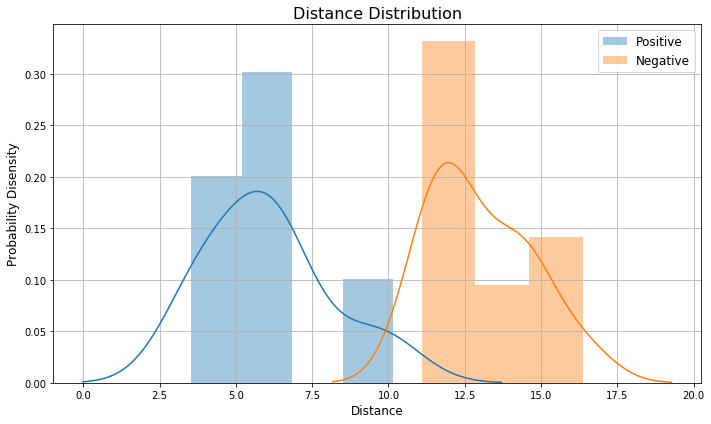

In [98]:
visualize(pair_distance, other_distance)

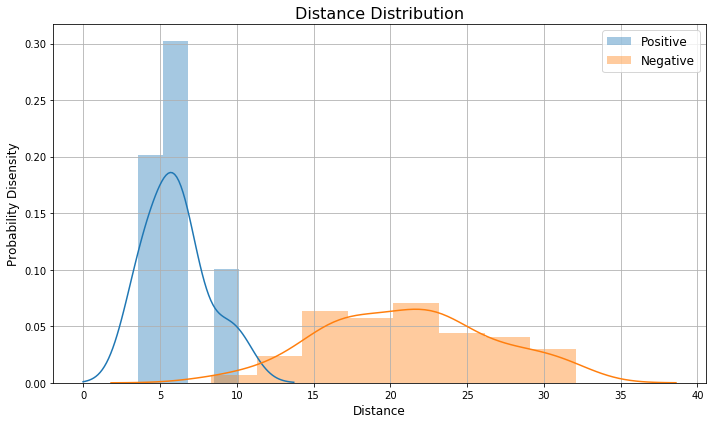

In [99]:
visualize(pair_distance, other_distance_100)

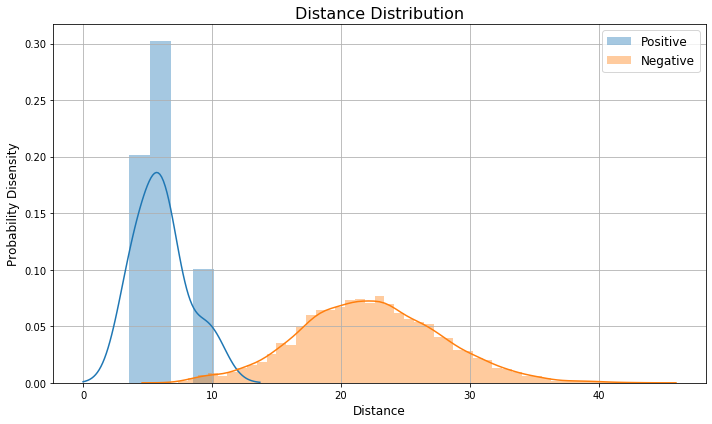

In [100]:
visualize(pair_distance, other_distance_6835)